In [31]:
import acquire
import warnings
warnings.filterwarnings("ignore")
import prepare
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.model_selection import train_test_split

**Exercises**
Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

**Section 1 - iris_db:** Using iris data from our mySQL server and the methods used in the lesson above:



**1. Acquire, prepare & split your data.**



In [2]:
iris = prepare.prep_iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [7]:
train, test = train_test_split(iris, train_size=0.8, random_state=42, stratify=iris.species)
train, validate = train_test_split(train, train_size=0.7, random_state=42, stratify=train.species)
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

**2. Univariate Stats**



1. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).



In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 131 to 65
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        84 non-null     float64
 1   sepal_width         84 non-null     float64
 2   petal_length        84 non-null     float64
 3   petal_width         84 non-null     float64
 4   species             84 non-null     object 
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


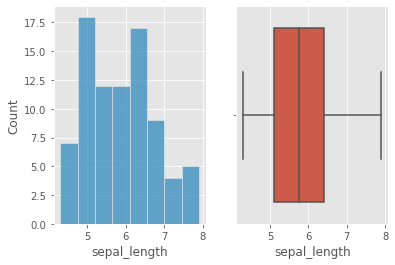

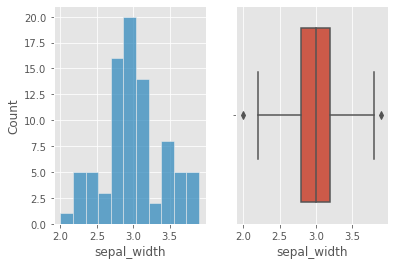

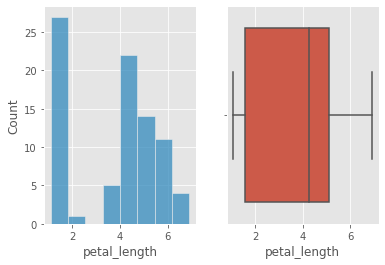

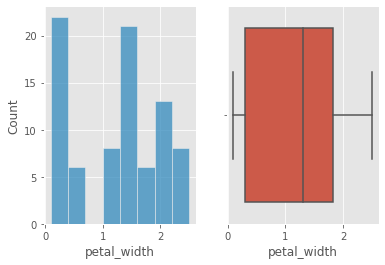

In [32]:
univariate_cols = train.select_dtypes('float64').columns.tolist()
for col in univariate_cols:
    plt.subplot(1,2,1)
    sns.histplot(train[col])
    plt.subplot(1,2,2)
    sns.boxplot(train[col])
    plt.show()

2. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.



In [33]:
train.species.value_counts()

virginica     28
versicolor    28
setosa        28
Name: species, dtype: int64

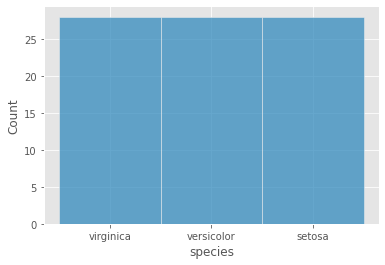

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

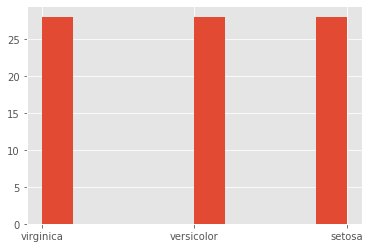

In [36]:
sns.histplot(train.species)
plt.show()
plt.hist(train.species)

3. Document takeaways & any actions.



In [ ]:
#there is a uniform distribution of species in the data set

**3. Bivariate Stats**



1. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).



2. For each measurement type, compute the descriptive statistics for each species.



3. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.



4. Document takeaways & any actions.



**4. Multivariate Stats**



1. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.



2. Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col



3. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.



4. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).



5. Document takeaways and any actions.